In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0

After that, `%tensorflow_version 1.x` will throw an error.

Your notebook should be updated to use Tensorflow 2.
See the guide at https://www.tensorflow.org/guide/migrate#migrate-from-tensorflow-1x-to-tensorflow-2.

TensorFlow 1.x selected.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.1 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [3]:
! git clone https://github.com/HarshiniBhat/Mask_rcnn.git

Cloning into 'Mask_rcnn'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 71 (delta 33), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (71/71), done.


In [ ]:
% cd Mask_rcnn/
% pip install -r requirements.txt

/content/Mask_rcnn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 31.6 MB/s 
     |████████████████████████████████| 298 kB 29.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=0533f495038b358f6969a63146271d4f488253d26b339a3e17537d7793541c01
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.2 which is incompatible.


In [ ]:
% cd /content/Mask_rcnn/mrcnn
from m_rcnn import *
%matplotlib inline

/content/Mask_rcnn/mrcnn
VERS 0.2


Using TensorFlow backend.


In [ ]:
#Loading dataset
# Extract Images
images_path = "dataset.zip"
annotations_path = "annotations.json"

extract_images(os.path.join("/content/drive/My Drive/Mask_rcnn",images_path), "/content/dataset")

Extracted: 43 images


In [ ]:
dataset_train = load_image_dataset(os.path.join("/content/drive/My Drive/Mask_rcnn", annotations_path), "/content/drive/My Drive/Mask_rcnn/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/drive/My Drive/Mask_rcnn", annotations_path), "/content/drive/My Drive/Mask_rcnn/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/drive/My Drive/Mask_rcnn/annotations.json
Annotation json path:  /content/drive/My Drive/Mask_rcnn/annotations.json
Train: 39
Validation: 4
Classes: 1


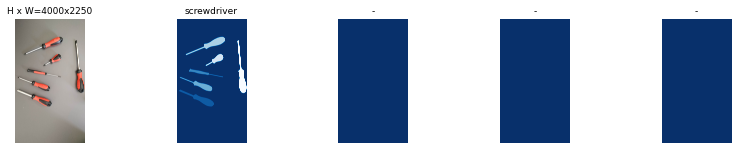

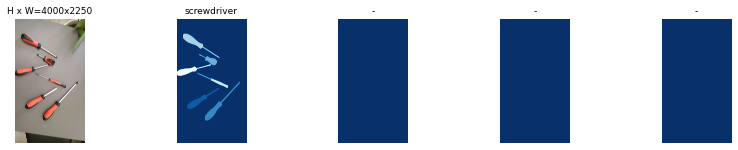

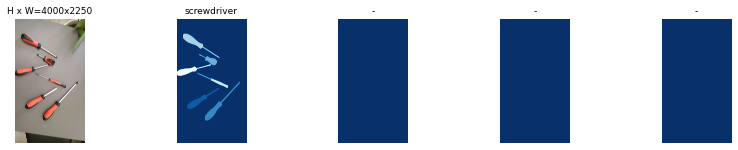

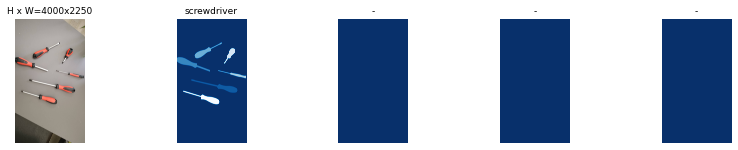

In [ ]:
# Load image samples
display_image_samples(dataset_train)

3. Training
Train Mask RCNN on your custom Dataset.

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
/content/drive/MyDrive/Mask_rcnn/logs/mask_rcnn_coco.h5


In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config,6)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/MyDrive/Mask_rcnn/logs/object20220725T1331/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)

In [ ]:
import importlib
importlib.reload(nameOfModule)

4. Detection (test your model on a random image)

In [ ]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)



Instructions for updating:
Use `tf.cast` instead.


FileNotFoundError: ignored

original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


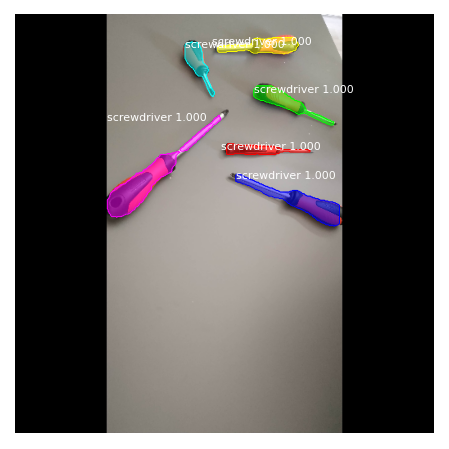

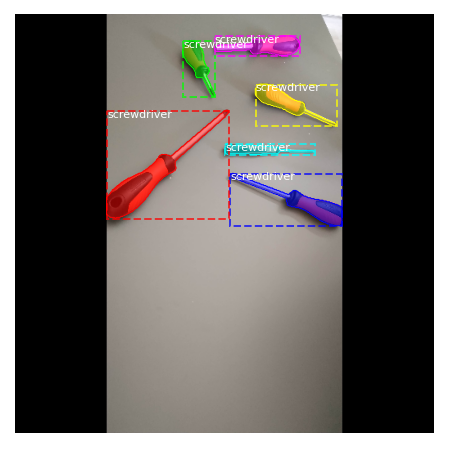

In [ ]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)

In [ ]:
# Load Image
from visualize import random_colors, get_mask_contours, draw_mask
img = cv2.imread("/content/scd.jpeg")

test_model, inference_config = load_inference_model(1, "/content/drive/MyDrive/Mask_rcnn/logs/object20220707T1548/mask_rcnn_object_0005.h5")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]
colors = random_colors(80)

Loading weights from  /content/drive/MyDrive/Mask_rcnn/logs/object20220707T1548/mask_rcnn_object_0005.h5
Re-starting from epoch 5


In [ ]:
from google.colab.patches import cv2_imshow
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])

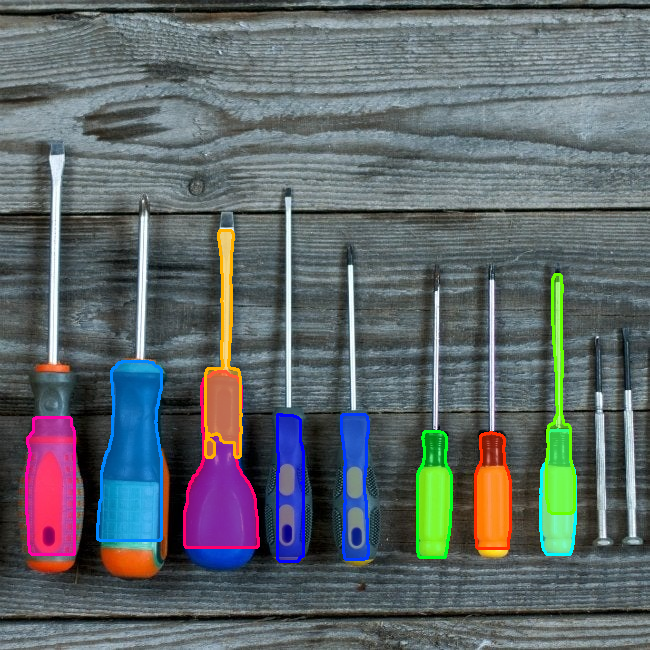

In [ ]:
cv2_imshow(img)